# One Piece Arcs

<img src="https://pbs.twimg.com/ext_tw_video_thumb/1474892966183514120/pu/img/w_uQLKGI0a874Dy6.jpg:large" alt="One Piece logo"/>

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

import warnings
warnings.filterwarnings("ignore")

In [34]:
plt.rcParams['figure.figsize'] = (18,9)
plt.rcParams['font.family'] = 'DejaVu Sans'
plt.rcParams['font.style'] = "oblique"

In [3]:
data = pd.read_csv("OnePieceArcs.csv")

In [4]:
data.head(10)

,Arc,Start onChapter,TotalChapters,TotalPages,Manga%,Start onEpisode,TotalEpisodes,TotalMinutes(avg 24),Anime%
0,Romance Dawn Arc,1,7,178,0.9%,1,3,72,0.3%
1,Orange Town Arc,8,14,273,1.4%,4,5,120,0.5%
2,Syrup Village Arc,22,20,396,2.0%,9,10,240,1.0%
3,Baratie Arc,42,27,514,2.6%,19,12,288,1.2%
4,Arlong Park Arc,69,27,514,2.6%,31,15,360,1.5%
5,Buggy Side Story Arc,0,0,0,0.0%,46,2,48,0.2%
6,Loguetown Arc,96,5,100,0.5%,48,6,144,0.6%
7,Warship Island Arc,0,0,0,0.0%,54,8,192,0.8%
8,Reverse Mountain Arc,101,5,96,0.5%,62,2,48,0.2%
9,Whiskey Peak Arc,106,9,169,0.9%,64,4,96,0.4%


In [5]:
### Maximum Episode

max_episode = data[data['TotalEpisodes'] == data['TotalEpisodes'].max()]
max_episode

,Arc,Start onChapter,TotalChapters,TotalPages,Manga%,Start onEpisode,TotalEpisodes,TotalMinutes(avg 24),Anime%
41,Dressrosa Arc,700,102,1830,9.4%,629,118,2832,11.5%


In [6]:
#Well this is very suprising, Wano is supposed to have maximum

In [7]:
data.tail(5)

,Arc,Start onChapter,TotalChapters,TotalPages,Manga%,Start onEpisode,TotalEpisodes,TotalMinutes(avg 24),Anime%
46,Levely Arc,903,6,100,0.5%,878,12,288,1.2%
47,Wano Country Arc: Act 1,909,16,278,1.4%,890,26,624,2.5%
48,Cidre Guild Arc,0,0,0,0.0%,895,2,48,0.2%
49,Wano Country Arc: Act 2,925,33,560,2.9%,918,41,984,4.0%
50,Wano Country Arc: Act 3,958,99,1709,8.8%,959,70,1680,6.8%


In [8]:
# Lets combine Wano Country Arc into 1
wanoData = data.loc[47:50]
wanoData.drop(48,axis=0,inplace=True)

In [9]:
wanoTotalChapters = sum(wanoData['TotalChapters'])
wanoTotalPages = sum(wanoData['TotalPages'])
wanoMangaPercent = "{:.1f}".format(wanoTotalChapters/sum(data['TotalChapters'])*100)+"%"

wanoTotalEpisode = sum(wanoData['TotalEpisodes'])
wanoTotalMinutes = sum(wanoData['TotalMinutes(avg 24)'])
wanoAnimePercent = "{:.1f}".format(wanoTotalEpisode/sum(data['TotalEpisodes'])*100)+"%"

In [10]:
data.loc[len(data.index)] = ['Wano',909,wanoTotalChapters,wanoTotalPages,wanoMangaPercent,890,wanoTotalEpisode,wanoTotalMinutes,wanoAnimePercent]

In [11]:
data.tail(5)

,Arc,Start onChapter,TotalChapters,TotalPages,Manga%,Start onEpisode,TotalEpisodes,TotalMinutes(avg 24),Anime%
47,Wano Country Arc: Act 1,909,16,278,1.4%,890,26,624,2.5%
48,Cidre Guild Arc,0,0,0,0.0%,895,2,48,0.2%
49,Wano Country Arc: Act 2,925,33,560,2.9%,918,41,984,4.0%
50,Wano Country Arc: Act 3,958,99,1709,8.8%,959,70,1680,6.8%
51,Wano,909,148,2547,14.0%,890,137,3288,13.3%


In [12]:
data.drop(wanoData.index,axis=0,inplace=True)

In [13]:
data.tail()

,Arc,Start onChapter,TotalChapters,TotalPages,Manga%,Start onEpisode,TotalEpisodes,TotalMinutes(avg 24),Anime%
44,Marine Rookie Arc,0,0,0,0.0%,780,3,72,0.3%
45,Whole Cake Island Arc,825,78,1349,6.9%,783,95,2280,9.2%
46,Levely Arc,903,6,100,0.5%,878,12,288,1.2%
48,Cidre Guild Arc,0,0,0,0.0%,895,2,48,0.2%
51,Wano,909,148,2547,14.0%,890,137,3288,13.3%


### Maximum Episode

In [14]:
max_episode = data[data['TotalEpisodes'] == data['TotalEpisodes'].max()]
print(f"{max_episode.iloc[0].values[0]} has highest number of episodes: {max_episode.iloc[0].values[-3]} episodes")

Wano has highest number of episodes: 137 episodes


### Maximum Watch Time

In [15]:
max_watchTime = data[data['TotalMinutes(avg 24)'] == data['TotalMinutes(avg 24)'].max()]
print(f"{max_episode.iloc[0].values[0]} has highest maximum watch Time: {max_episode.iloc[0].values[-2]} minutes")

Wano has highest maximum watch Time: 3288 minutes


### Filter % symbol from Manga% and Anime%

In [16]:
def filter_percent(data):
    return data[:-1]

In [17]:
data['Manga%'] = data['Manga%'].apply(filter_percent).astype(float)
data['Anime%'] = data['Anime%'].apply(filter_percent).astype(float)

In [18]:
data.sample(20)

,Arc,Start onChapter,TotalChapters,TotalPages,Manga%,Start onEpisode,TotalEpisodes,TotalMinutes(avg 24),Anime%
30,Special Historical Arc,0,0,0,0.0,406,2,48,0.2
9,Whiskey Peak Arc,106,9,169,0.9,64,4,96,0.4
34,Marineford Arc,550,31,529,2.7,457,33,792,3.2
24,Enies Lobby Arc,375,56,1060,5.4,264,49,1176,4.8
25,Post-Enies Lobby Arc,431,11,209,1.1,313,13,312,1.3
20,Long Ring Long Land Arc,303,19,365,1.9,207,15,360,1.5
38,Z's Ambition Arc,0,0,0,0.0,575,4,96,0.4
33,Little East Blue Arc,0,0,0,0.0,426,4,96,0.4
28,Spa Island Arc,0,0,0,0.0,382,3,72,0.3
18,Skypiea Arc,237,66,1242,6.4,153,43,1032,4.2


<AxesSubplot:>

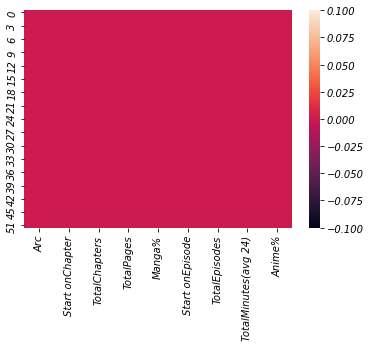

In [19]:
sns.heatmap(data.isnull())

Text(0.5, 1.0, 'Arc vs Total Episode')

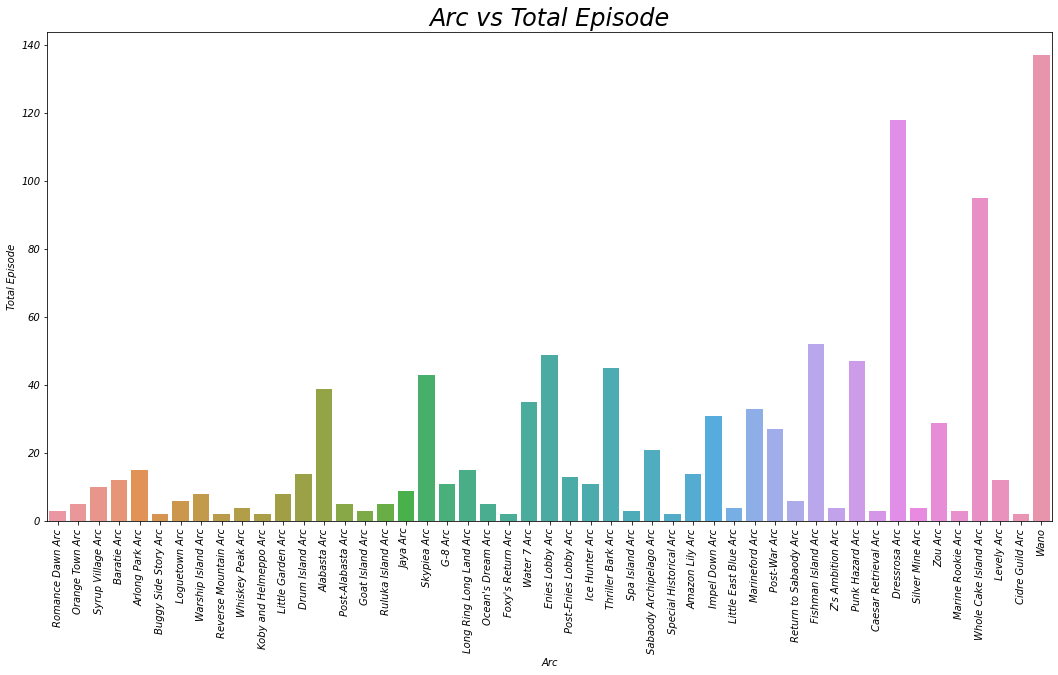

In [35]:
sns.barplot(data['Arc'],data['TotalEpisodes'])
plt.xticks(rotation=90)
plt.xlabel("Arc")
plt.ylabel("Total Episode")
plt.title("Arc vs Total Episode",fontsize=24)

Text(0.5, 1.0, 'Arc vs Total Episode')

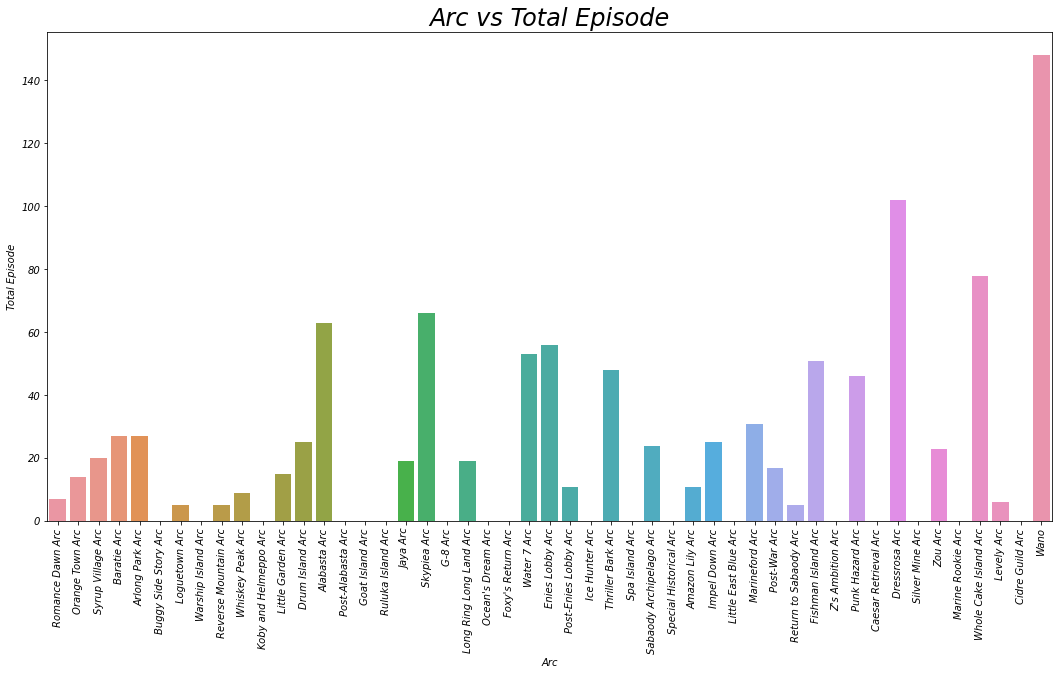

In [36]:
sns.barplot(data['Arc'],data['TotalChapters'])
plt.xticks(rotation=90)
plt.xlabel("Arc")
plt.ylabel("Total Episode")
plt.title("Arc vs Total Episode",fontsize=24)

### Filler Episodes List

In [22]:
filler_epsiode = data[data['TotalChapters'] == 0]

In [23]:
filler_epsiode

,Arc,Start onChapter,TotalChapters,TotalPages,Manga%,Start onEpisode,TotalEpisodes,TotalMinutes(avg 24),Anime%
5,Buggy Side Story Arc,0,0,0,0.0,46,2,48,0.2
7,Warship Island Arc,0,0,0,0.0,54,8,192,0.8
10,Koby and Helmeppo Arc,0,0,0,0.0,68,2,48,0.2
14,Post-Alabasta Arc,0,0,0,0.0,131,5,120,0.5
15,Goat Island Arc,0,0,0,0.0,136,3,72,0.3
16,Ruluka Island Arc,0,0,0,0.0,139,5,120,0.5
19,G-8 Arc,0,0,0,0.0,196,11,264,1.1
21,Ocean's Dream Arc,0,0,0,0.0,220,5,120,0.5
22,Foxy's Return Arc,0,0,0,0.0,225,2,48,0.2
26,Ice Hunter Arc,0,0,0,0.0,326,11,264,1.1


In [24]:
### Maximum Episode in a Filler

In [25]:
max_filler_episode = filler_epsiode[filler_epsiode['TotalEpisodes'] == filler_epsiode['TotalEpisodes'].max()]

In [26]:
max_filler_episode

,Arc,Start onChapter,TotalChapters,TotalPages,Manga%,Start onEpisode,TotalEpisodes,TotalMinutes(avg 24),Anime%
19,G-8 Arc,0,0,0,0.0,196,11,264,1.1
26,Ice Hunter Arc,0,0,0,0.0,326,11,264,1.1


In [31]:
ax = px.histogram(data,x='TotalEpisodes',marginal="box",nbins=18)
ax.update_layout(bargap=0.2)

In [32]:
ax = px.histogram(data,x='TotalChapters',marginal="box",nbins=18)
ax.update_layout(bargap=0.2)

In [37]:
data[['Manga%','Anime%']]

,Manga%,Anime%
0,0.9,0.3
1,1.4,0.5
2,2.0,1.0
3,2.6,1.2
4,2.6,1.5
5,0.0,0.2
6,0.5,0.6
7,0.0,0.8
8,0.5,0.2
9,0.9,0.4


In [39]:
ax = px.histogram(data,x='TotalPages',marginal="box",nbins=18)
ax.update_layout(bargap=0.2)

### Dataset by [Anime Vyuh](https://animevyuh.org): *A Fusion of Coding And Anime*
#### Support: [BuyMeACoffee](https://www.buymeacoffee.com/trjtarun), [KoFi](https://ko-fi.com/tarunrjain751)